# Проект "Телеком "

##  Загрузка и исследование данных

In [1]:
import pandas as pd #импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as ltb
import lightgbm as LGBMClassifier

In [2]:
try: # загрузим данные
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')
except: 
    df_contract = pd.read_csv('contract.csv')
    df_internet = pd.read_csv('internet.csv')
    df_personal = pd.read_csv('personal.csv')
    df_phone = pd.read_csv('phone.csv')

In [3]:
df_contract.head() # датасет "информация о договоре"

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.info() # общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_contract["MonthlyCharges"].describe() # статистические данные

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

В датасете contract данные представлены в типе данных - объект. Пропусков данных нет. 

In [6]:
df_internet.head() # датасет "информация об интернет-услугах"

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
df_internet.info() # общая информация  пропусков данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [8]:
df_personal.head() # датасет "персональные данные клиента"

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
df_personal.info() # пропусков данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
df_phone.head() # датасет "информация об услугах телефонии"

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [11]:
df_phone.info() # пропусков данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


##  Подготовка данных

1. Приведем названия признаков к нижнему регистру: 

In [12]:
df_contract.columns = df_contract.columns.str.lower()

In [13]:
df_internet.columns = df_internet.columns.str.lower()

In [14]:
df_personal.columns = df_personal.columns.str.lower()

In [15]:
df_phone.columns = df_phone.columns.str.lower()

2. Создадим целевой признак churn (отток абонентов) на основе признака EndDate. А также признак churn_digit. 

In [16]:
df_contract.loc[df_contract['enddate'] == 'No', 'churn'] = False # если есть EndDate, то  churn равен True

In [17]:
df_contract.loc[df_contract['enddate'] == 'No', 'churn_digit'] = 0 # если нет данных EndDate, то  churn_digit равен 0

In [18]:
df_contract.loc[df_contract['enddate'] != 'No', 'churn_digit'] = 1 # если есть в  EndDate, то  churn_digit равен 0

In [19]:
df_contract['churn'] = df_contract['churn'].astype('bool') # новый признак имеет булев тип

In [20]:
df_contract.head() # проверка

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_digit
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,0.0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,False,0.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,True,1.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,True,1.0


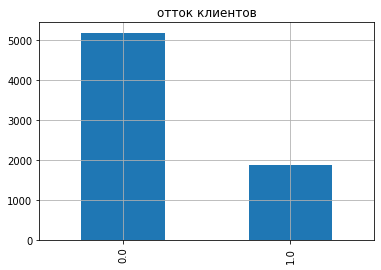

In [21]:
df_contract['churn_digit'].value_counts().plot(kind='bar',grid=True, title='отток клиентов')
plt.show()

Видно, что отток клиентов описывается соотношением 1:2 (остались-ушли). Далее проведем борьбу с дисбалансом. 

3. Пребразуем строковые значения с датой в формат datetime:

In [22]:
df_contract['begindate'] = pd.to_datetime(df_contract['begindate'], format = '%Y.%m.%d')
df_contract['enddate'] = pd.to_datetime(df_contract['enddate'], format = '%Y.%m.%d', errors='coerce')

In [23]:
df_contract['enddate1']= df_contract['enddate'].fillna('2020-02-01') 
# столбец, в котором момент окончания проставлена дата 2020-02-01, по указанию задачи

In [24]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  enddate1          7043 non-null   object        
dtypes: bool(1), datetime64[ns](2), float64(2), object(6)
memory usage: 557.2+ KB


Посчитаем сколько времени пользователя является клиентом: 

In [25]:
#вспомогательные столбцы для вычислений, ниже удалим
df_contract['begin_year'] = pd.DatetimeIndex(df_contract['begindate']).year
df_contract['end_year'] = pd.DatetimeIndex(df_contract['enddate1']).year
df_contract['begin_month'] = pd.DatetimeIndex(df_contract['begindate']).month
df_contract['end_month'] = pd.DatetimeIndex(df_contract['enddate1']).month

In [26]:
#добавляем признак Months: сколько полных месяцев клиент с нами
df_contract['months'] = ((df_contract['end_year']- df_contract['begin_year']) * 12 + (df_contract['end_month'] - df_contract['begin_month']))


In [27]:
df_contract.head(2)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_digit,enddate1,begin_year,end_year,begin_month,end_month,months
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,0.0,2020-02-01,2020,2020,1,2,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,False,0.0,2020-02-01,2017,2020,4,2,34


In [28]:
df_contract['enddate1'] = pd.to_datetime(df_contract['enddate1'], format = '%Y.%m.%d')

<div class="alert alert-info">
<h16> Введем параметр day, количество дней, которое пользователь является клиентом 
<br> </h16>
</div>

In [29]:
df_contract['day'] = (df_contract['enddate1']- df_contract['begindate'])
# df_contract['day'] = df_contract['day'].astype('float')

In [30]:
df_contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_digit,enddate1,begin_year,end_year,begin_month,end_month,months,day
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,0.0,2020-02-01,2020,2020,1,2,1,31 days
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,False,0.0,2020-02-01,2017,2020,4,2,34,1036 days
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,1.0,2019-12-01,2019,2019,10,12,2,61 days
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,0.0,2020-02-01,2016,2020,5,2,45,1371 days
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,1.0,2019-11-01,2019,2019,9,11,2,61 days


In [120]:
df_contract['day'] = pd.DataFrame(df_contract['day']).apply(np.float32) 
# изменим тип данных указанного параметра на float

In [32]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  enddate1          7043 non-null   datetime64[ns]
 11  begin_year        7043 non-null   int64         
 12  end_year          7043 non-null   int64         
 13  begin_month       7043 non-null   int64         
 14  end_month         7043 n

In [33]:
df_contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_digit,enddate1,begin_year,end_year,begin_month,end_month,months,day
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,0.0,2020-02-01,2020,2020,1,2,1,2.678400e+15
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,False,0.0,2020-02-01,2017,2020,4,2,34,8.951040e+16
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,1.0,2019-12-01,2019,2019,10,12,2,5.270400e+15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,0.0,2020-02-01,2016,2020,5,2,45,1.184544e+17
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,1.0,2019-11-01,2019,2019,9,11,2,5.270400e+15


In [34]:
df_contract = df_contract.drop(['begin_year','end_year','begin_month','end_month', 'enddate1'], axis=1)

In [35]:
df_contract.isnull().sum()

customerid             0
begindate              0
enddate             5174
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
churn                  0
churn_digit            0
months                 0
day                    0
dtype: int64

4. Преобразуем признак totalcharges (сумма всех платежей) в float64:

In [36]:
df_contract.loc[df_contract['totalcharges'] == ' ', 'totalcharges'] = df_contract['monthlycharges']
df_contract['totalcharges'] = df_contract['totalcharges'].astype('float')
# в столбце totalcharges есть пустые значения, заменим его на monthlycharges

In [37]:
df_contract.info() # проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  months            7043 non-null   int64         
 11  day               7043 non-null   float32       
dtypes: bool(1), datetime64[ns](2), float32(1), float64(3), int64(1), object(4)
memory usage: 584.7+ KB


5. Соединим датафреймы: 

In [38]:
df1 = df_contract.merge(df_internet, on='customerid', how='left') 
# выбираем левый тип соединения, чтобы все значения из df_internet попали в df_contract по ключу customerid

In [39]:
df1.info()  # проверка соединения 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  months            7043 non-null   int64         
 11  day               7043 non-null   float32       
 12  internetservice   5517 non-null   object        
 13  onlinesecurity    5517 non-null   object        
 14  onlinebackup      5517 n

In [40]:
df2 = df1.merge(df_personal, on='customerid')

In [41]:
df = df2.merge(df_phone, on='customerid', how='left')

In [42]:
df.info() # получили итоговый датафрейм

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  months            7043 non-null   int64         
 11  day               7043 non-null   float32       
 12  internetservice   5517 non-null   object        
 13  onlinesecurity    5517 non-null   object        
 14  onlinebackup      5517 n

##  Проведение исследования данных 

Сравните распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. Для каждой группы посчитайте статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Постройте гистограммы распределения.

Сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

1. Выделим группы абонентов и построим для них требуемые графики:<br>
    - для группы ушедших абонентов:

In [43]:
df_churn = df[df['churn'] == True]
df_churn.shape

(1869, 24)

In [44]:
df_churn['monthlycharges'].describe() 
# статистическое распределение величины monthlycharges (ежемесячного платёжа) для ушедших клиентов

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthlycharges, dtype: float64

In [45]:
df_churn['monthlycharges'].median()

79.65

Среднее значение ежемесячного платежа для ушедших клинтов было - 74.4, минимальное значение - 18.9, максимальное значение платежа - 118.4, медианное значение - 79.6. Величина 25%- квартили - 56.1, 75%-квартили - 94.2. 

<AxesSubplot:>

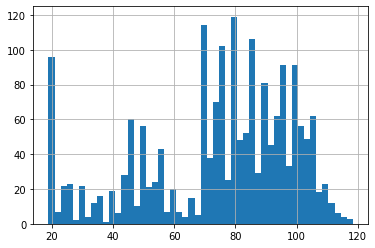

In [46]:
df_churn['monthlycharges'].hist(bins = 50) # гистограмма распределения ежемесячного платёжа по ушедшим клиентам

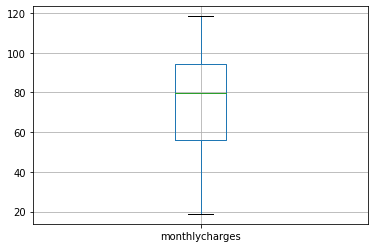

In [47]:
boxplot = df_churn.boxplot(column=['monthlycharges']) 
# распределение данных на графике "ящик с усами", на котором видно всю указанную выше статистическую информацию

In [48]:
df_churn.shape # напомним размер выборки

(1869, 24)

In [49]:
df_churn['internetservice'] = df_churn['internetservice'].fillna('No_internet')
df_churn['multiplelines'] = df_churn['multiplelines'].fillna('No_phone')

/tmp/ipykernel_600/784367437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['internetservice'] = df_churn['internetservice'].fillna('No_internet')
/tmp/ipykernel_600/784367437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['multiplelines'] = df_churn['multiplelines'].fillna('No_phone')


In [50]:
df_churn['internetservice'].unique()

array(['DSL', 'Fiber optic', 'No_internet'], dtype=object)

In [51]:
df_churn['multiplelines'].unique()

array(['No', 'Yes', 'No_phone'], dtype=object)

Ведем новое поле phone_internet, в котором значение 0 для тех, кто пользовался только телефонной связью, 1 - если подключен только интернет, 2 - если были и интернет и телефон. 

In [52]:
df_churn.loc[df_churn['internetservice'] == 'No_internet', 'phone_internet'] = 0  # 0 если только телефон
df_churn.loc[df_churn['multiplelines'] == 'No_phone', 'phone_internet'] = 1 # 1 если есть только интернет
df_churn['phone_internet'] = df_churn['phone_internet'].fillna(2) # 2 если есть интернет и телефон

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_600/144968195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

На круговой диаграмме отобразим процент среди ушедших пользователей: <br>
долю пользователей телефонной связи - 6 %;
долю интернет-пользователей - 9% .

<AxesSubplot:ylabel='internetservice'>

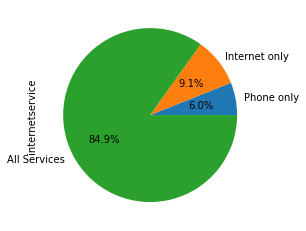

In [53]:
df_churn_total = df_churn.groupby('phone_internet')['internetservice'].count().sort_values()
df_churn_total.plot.pie(autopct='%1.1f%%', labels = ['Phone only', 'Internet only', 'All Services'])

    - для всех клиентов:

In [54]:
df['monthlycharges'].describe() 

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

In [55]:
df['monthlycharges'].median()

70.35

Среднее значение ежемесячного платежа для всех клинтов - 64,8, минимальное значение - 18.3, максимальное значение платежа - 118.8, медианное значение - 70.4. Величина 25%- квартили - 35,5, 75%-квартили - 89,9. 

<AxesSubplot:>

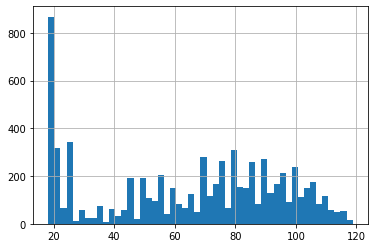

In [56]:
df['monthlycharges'].hist(bins = 50) # гистограмма распределения ежемесячного платёжа по всем клиентам

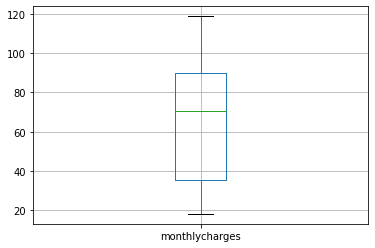

In [57]:
boxplot2 = df.boxplot(column=['monthlycharges']) 
# распределение данных на графике "ящик с усами", на котором видно всю указанную выше статистическую информацию

Уберем выбросы, находящиеся за 1.5 межквартальным интервалом, добавленного к Q3, для этого:

In [59]:
df.shape

(7043, 24)

In [60]:
df['internetservice'] = df['internetservice'].fillna('No_internet')
df['multiplelines'] = df['multiplelines'].fillna('No_phone')

In [61]:
df.loc[df['internetservice'] == 'No_internet', 'phone_internet'] = 0  # 0 если только телефон
df.loc[df['multiplelines'] == 'No_phone', 'phone_internet'] = 1 # 1 если есть только интернет
df['phone_internet'] = df['phone_internet'].fillna(2) # 2 если есть интернет и телефон

<AxesSubplot:ylabel='internetservice'>

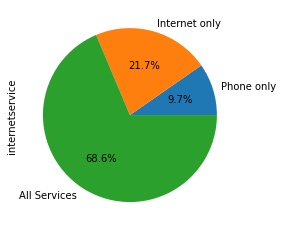

In [62]:
df_total = df.groupby('phone_internet')['internetservice'].count().sort_values()
df_total
df_total.plot.pie(autopct='%1.1f%%', labels = ['Phone only', 'Internet only', 'All Services'])


На круговой диаграмме отобразим процент среди пользователей: <br>
долю пользователей телефонной связи - 10%;
долю интернет-пользователей - 23% .

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   churn_digit       7043 non-null   float64       
 10  months            7043 non-null   int64         
 11  day               7043 non-null   float32       
 12  internetservice   7043 non-null   object        
 13  onlinesecurity    5517 non-null   object        
 14  onlinebackup      5517 n

1. Проведем кодирование данных:

In [64]:
df = df.drop(columns = ['customerid', 'churn', 'begindate', 'enddate']) 
# удалим столбцы, так как они не имеют значение для дальнейшего исследования

In [65]:
df.info() # проверим, что осталось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7043 non-null   object 
 1   paperlessbilling  7043 non-null   object 
 2   paymentmethod     7043 non-null   object 
 3   monthlycharges    7043 non-null   float64
 4   totalcharges      7043 non-null   float64
 5   churn_digit       7043 non-null   float64
 6   months            7043 non-null   int64  
 7   day               7043 non-null   float32
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    5517 non-null   object 
 10  onlinebackup      5517 non-null   object 
 11  deviceprotection  5517 non-null   object 
 12  techsupport       5517 non-null   object 
 13  streamingtv       5517 non-null   object 
 14  streamingmovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  seniorcitizen     7043 non-null   int64  


In [66]:
df_ohe = pd.get_dummies(df, drop_first=True) # произведем кодирование номинальных переменных

In [67]:
df_ohe.info() # проверим результат кодирования

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         7043 non-null   float64
 1   totalcharges                           7043 non-null   float64
 2   churn_digit                            7043 non-null   float64
 3   months                                 7043 non-null   int64  
 4   day                                    7043 non-null   float32
 5   seniorcitizen                          7043 non-null   int64  
 6   phone_internet                         7043 non-null   float64
 7   type_One year                          7043 non-null   uint8  
 8   type_Two year                          7043 non-null   uint8  
 9   paperlessbilling_Yes                   7043 non-null   uint8  
 10  paymentmethod_Credit card (automatic)  7043 non-null   uint8  
 11  paym

In [68]:
df_ohe

,monthlycharges,totalcharges,churn_digit,months,day,seniorcitizen,phone_internet,type_One year,type_Two year,paperlessbilling_Yes,...,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,gender_Male,partner_Yes,dependents_Yes,multiplelines_No_phone,multiplelines_Yes
0,29.85,29.85,0.0,1,2.678400e+15,0,1.0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
1,56.95,1889.50,0.0,34,8.951040e+16,0,2.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,108.15,1.0,2,5.270400e+15,0,2.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,42.30,1840.75,0.0,45,1.184544e+17,0,1.0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4,70.70,151.65,1.0,2,5.270400e+15,0,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0.0,24,6.307200e+16,0,2.0,1,0,1,...,0,1,1,1,1,1,1,1,0,1
7039,103.20,7362.90,0.0,72,1.893024e+17,0,2.0,1,0,1,...,1,1,0,1,1,0,1,1,0,1
7040,29.60,346.45,0.0,11,2.911680e+16,0,1.0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
7041,74.40,306.60,1.0,4,1.062720e+16,1,2.0,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [74]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         7043 non-null   float64
 1   totalcharges                           7043 non-null   float64
 2   churn_digit                            7043 non-null   float64
 3   months                                 7043 non-null   int64  
 4   day                                    7043 non-null   float32
 5   seniorcitizen                          7043 non-null   int64  
 6   phone_internet                         7043 non-null   float64
 7   type_One year                          7043 non-null   uint8  
 8   type_Two year                          7043 non-null   uint8  
 9   paperlessbilling_Yes                   7043 non-null   uint8  
 10  paymentmethod_Credit card (automatic)  7043 non-null   uint8  
 11  paym

2. Разобъем данные на выборки (обучающая, валидационная). На кроссвалидации определим лучшую модель, на тестовой определим метрику:

In [75]:
df_valid, df_test = train_test_split(df_ohe, test_size=0.25, random_state=25072022) 

In [76]:
df_test.shape # размер тестовой выборки

(1761, 26)

In [77]:
df_valid.shape # размер валидациионной выборки

(5282, 26)

3. Создадим признаки: 

In [78]:
target_test = df_test['churn_digit'] # целевой признак тестовой выборки
features_test = df_test.drop(['churn_digit'], axis=1) 

In [79]:
target_valid = df_valid['churn_digit'] # целевой признак валидационной выборки
features_valid = df_valid.drop(['churn_digit'], axis=1) 

4. Масштабирование данных: <br>
Признаки имеют данные разного масштаба. Проведем масштабированое путем стандартизации данных:

In [80]:
numeric = ['monthlycharges', 'totalcharges', 'months', 'day']
scaler = StandardScaler()
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
pd.options.mode.chained_assignment = None # чтобы убрать предупреждение

In [81]:
print("features_test:", features_test.shape)
print("target_test", target_test.shape)
print("features_valid", features_valid.shape)
print("target_valid", target_valid.shape)

features_test: (1761, 25)
target_test (1761,)
features_valid (5282, 25)
target_valid (5282,)


Так как целевой признак принимает одно из двух значений: 0 или 1, то задача предсказания будет являться задачей классификации. 

Проведем анализ важности признаков:

На примере модели Дерево решений

In [82]:
model_tree = DecisionTreeClassifier(class_weight = 'balanced', random_state=25072022)

In [83]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
#grid_tree = GridSearchCV(model_tree, tree_param, cv=5, scoring='roc_auc')  
#grid_tree.fit(features_valid, target_valid)
#grid_tree.best_params_  
# подберем оптимальные параметры модели, закоментим, потому что долго

In [84]:
model_tree_optimal = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 6, random_state=25072022)
model_tree_optimal.fit(features_valid, target_valid)
prediction_tree_test = model_tree_optimal.predict(features_test)

Проведем анализа важности факторов с помощью команды feature_importances_. 
Отберем топ 6 признаков, которые максимально влияют на целевой признак. В дальнейшем все исследование проведем с использованием этих признаков. 

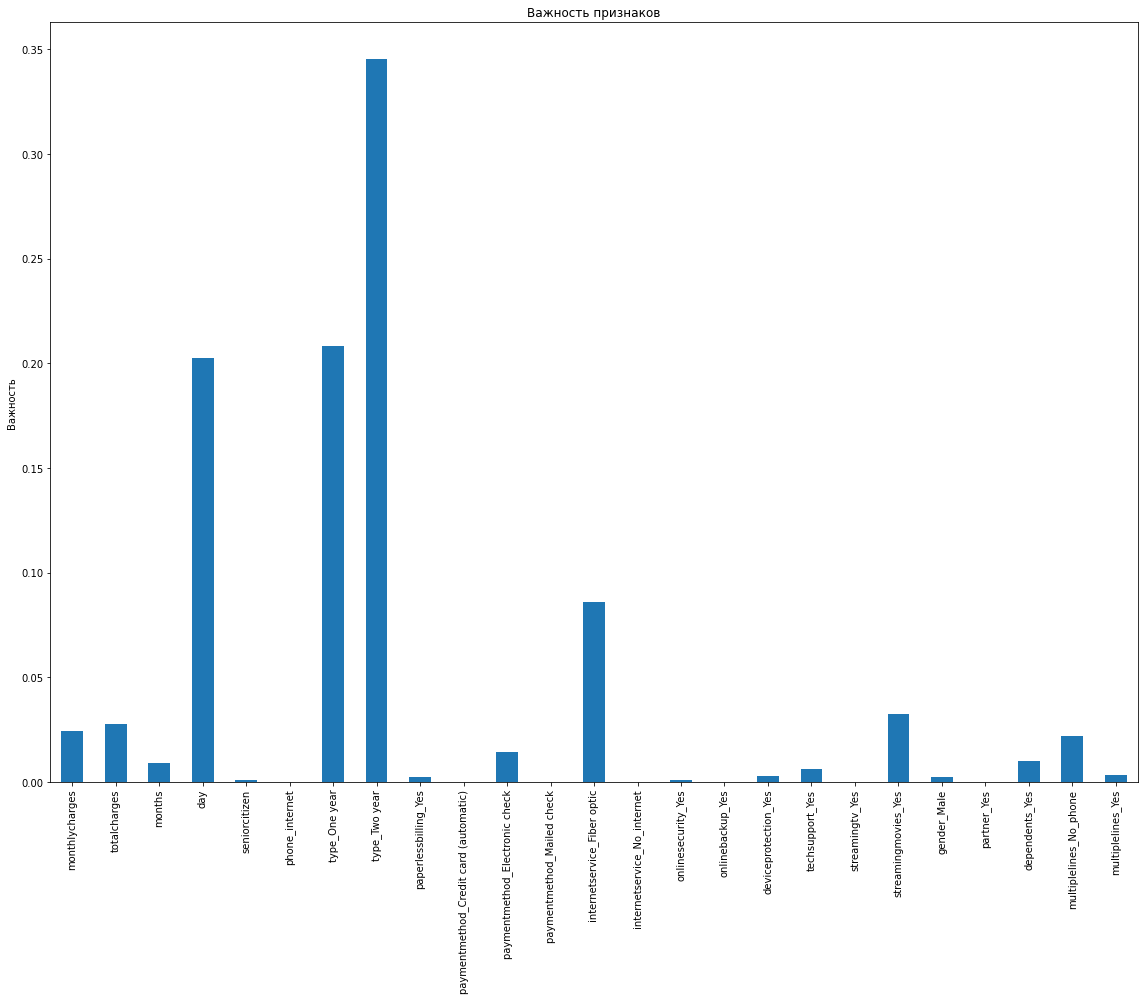

In [85]:
skl_iris_imp = pd.Series(model_tree_optimal.feature_importances_,
                         df_ohe.drop(['churn_digit'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Как видно из графика максимальное влияние на целевой признак оакзывают: 'type_One year', 'type_Two year', 'monthlycharges', 'totalcharges', 'months', 'internetservice_Fiber optic'. 
Остальные признаки имеют слабое значение, удалим их:

In [86]:
df_ohe_drop = df_ohe.drop(columns = ['months', 'partner_Yes', 'dependents_Yes', 'seniorcitizen', 'paymentmethod_Credit card (automatic)', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check', 'phone_internet', 'internetservice_No_internet', 'onlinesecurity_Yes', 'onlinebackup_Yes', 'deviceprotection_Yes', 'streamingtv_Yes', 'streamingmovies_Yes', 'gender_Male', 'multiplelines_No_phone', 'multiplelines_Yes', 'paperlessbilling_Yes', 'techsupport_Yes', 'partner_Yes']) 
df_ohe_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monthlycharges               7043 non-null   float64
 1   totalcharges                 7043 non-null   float64
 2   churn_digit                  7043 non-null   float64
 3   day                          7043 non-null   float32
 4   type_One year                7043 non-null   uint8  
 5   type_Two year                7043 non-null   uint8  
 6   internetservice_Fiber optic  7043 non-null   uint8  
dtypes: float32(1), float64(3), uint8(3)
memory usage: 268.2 KB


Далее с полученным датафреймом заново разобьем данные на выборки и дальнейшее исследование проведем с полученными DF.

In [87]:
df_valid_drop, df_test_drop = train_test_split(df_ohe_drop, test_size=0.25, random_state=25072022) 

In [88]:
target_test_drop = df_test_drop['churn_digit'] # целевой признак тестовой выборки
features_test_drop = df_test_drop.drop(['churn_digit'], axis=1) 

In [89]:
target_valid_drop = df_valid_drop['churn_digit'] # целевой признак валидационной выборки
features_valid_drop = df_valid_drop.drop(['churn_digit'], axis=1) 

In [90]:
numeric = ['monthlycharges', 'totalcharges', 'day']
scaler = StandardScaler()
scaler.fit(features_test_drop[numeric])
features_test_drop[numeric] = scaler.transform(features_test_drop[numeric])
features_valid_drop[numeric] = scaler.transform(features_valid_drop[numeric])
pd.options.mode.chained_assignment = None # чтобы убрать предупреждение

In [91]:
print("features_test_drop:", features_test_drop.shape)
print("target_test_drop", target_test_drop.shape)
print("features_valid_drop", features_valid_drop.shape)
print("target_valid_drop", target_valid_drop.shape)

features_test_drop: (1761, 6)
target_test_drop (1761,)
features_valid_drop (5282, 6)
target_valid_drop (5282,)


Проведем борьбу с дисбалансом. 
Объектов отрицательного класса больше. Продублируем объекты положительного класса и объединим их с объектами отрицательного класса.

In [92]:
def upsample(features, target, repeat): 
    features_zeros = features[target == 0] #  разделим обучающую выборку на отрицательные и положительные объекты
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_valid_drop, target_valid_drop, 10)

## Исследование моделей

Исследуем несколько моделей и выберем лучший результат.

1. Логистическая регрессия

In [93]:
model_lr = LogisticRegression(random_state=25072022)
parameters_lr = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_lr = GridSearchCV(model_lr,parameters_lr, cv=5, scoring='roc_auc')  
grid_lr.fit(features_upsampled, target_upsampled)
grid_lr.best_params_  # подберем оптимальные параметры модели

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

{'C': 10}

In [94]:
model_lr_optimal = LogisticRegression(penalty = 'l2', random_state=25072022)

In [95]:
model_lr_optimal.fit(features_upsampled, target_upsampled)

LogisticRegression(random_state=25072022)

In [96]:
probabilities_valid_model_logistic = model_lr_optimal.predict_proba(features_test_drop)
probabilities_one_valid_model_logistic = probabilities_valid_model_logistic[:, 1]

auc_roc_model_logistic = roc_auc_score(target_test_drop, probabilities_one_valid_model_logistic)
print('для логистической регрессии AUC-ROC равно', auc_roc_model_logistic)

для логистической регрессии AUC-ROC равно 0.8334311481842902


In [97]:
fpr_log, tpr_log, thresholds_log = roc_curve(target_test_drop, probabilities_one_valid_model_logistic)

2. Дерево решений

In [98]:
model_tree_dr = DecisionTreeClassifier(class_weight = 'balanced', random_state=25072022)

In [99]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
#grid_tree = GridSearchCV(model_tree_dr, tree_param, cv=5, scoring='roc_auc')  
#grid_tree.fit(features_upsampled, target_upsampled)
#grid_tree.best_params_  
# подберем оптимальные параметры модели, закоментим, потому что долго

In [100]:
model_tree_dr_optimal = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 20, random_state=25072022)
model_tree_dr_optimal.fit(features_upsampled, target_upsampled)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, random_state=25072022)

In [101]:
probabilities__valid_model_tree=model_tree_dr_optimal.predict_proba(features_test_drop)
probabilities_one_valid_tree=probabilities__valid_model_tree[:,1]

auc_roc_model_tree = roc_auc_score(target_test_drop, probabilities_one_valid_tree)
print('для решающего девева AUC-ROC равно', auc_roc_model_tree)

для решающего девева AUC-ROC равно 0.766963352421699


In [102]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_test_drop, probabilities_one_valid_tree)

3. Случайный лес

In [103]:
model_forest = RandomForestClassifier(class_weight = 'balanced', random_state=25072022)

In [104]:
parametrs_rf = { 'n_estimators': range (10, 50, 10),
              'max_depth': range (1,30, 5),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,10,2) }

#grid_rf = GridSearchCV(model_forest,parametrs_rf, cv=5, scoring='roc_auc')  
#grid_rf.fit(features_upsampled, target_upsampled)
#grid_rf.best_params_  

# Закоментируем, потому что очень долго длится подбор параметров 

In [105]:
model_rf_optimal = RandomForestClassifier(class_weight = 'balanced', max_depth = 26, min_samples_leaf = 1, min_samples_split = 2,\
                                          n_estimators = 40)
model_rf_optimal.fit(features_upsampled, target_upsampled)

RandomForestClassifier(class_weight='balanced', max_depth=26, n_estimators=40)

In [106]:
probabilities__valid_model_forest=model_rf_optimal.predict_proba(features_test_drop)
probabilities_one_valid_forest=probabilities__valid_model_forest[:,1]

auc_roc_model_forest = roc_auc_score(target_test_drop, probabilities_one_valid_forest)
print('для случайного леса AUC-ROC равно', auc_roc_model_forest)

для случайного леса AUC-ROC равно 0.8415764049743194


In [107]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_test_drop, probabilities_one_valid_forest)

4. Градиентный бустинг(CatBoost)

In [108]:
model_cb = CatBoostClassifier(random_state=25072022)

In [109]:
parametrs_gb = { 'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3]}  
#grid_gb = GridSearchCV(model_cb, parametrs_gb, scoring='roc_auc') # Обучим 
#grid_gb.fit(features_upsampled, target_upsampled)
#grid_gb.best_params_  # подберем оптимальные параметры модели  

In [110]:
model_cb_optimal = CatBoostClassifier(depth = 10, l2_leaf_reg = 1, learning_rate = 0.1, random_state=25072022)
model_cb_optimal.fit(features_upsampled, target_upsampled)

0:	learn: 0.6176761	total: 54.6ms	remaining: 54.6s
1:	learn: 0.5675144	total: 58.5ms	remaining: 29.2s
2:	learn: 0.5230061	total: 62.3ms	remaining: 20.7s
3:	learn: 0.4851244	total: 72.4ms	remaining: 18s
4:	learn: 0.4530095	total: 92.7ms	remaining: 18.5s
5:	learn: 0.4291376	total: 109ms	remaining: 18.1s
6:	learn: 0.4139461	total: 115ms	remaining: 16.4s
7:	learn: 0.4009506	total: 121ms	remaining: 15s
8:	learn: 0.3849260	total: 138ms	remaining: 15.2s
9:	learn: 0.3789438	total: 142ms	remaining: 14.1s
10:	learn: 0.3682841	total: 159ms	remaining: 14.3s
11:	learn: 0.3595341	total: 177ms	remaining: 14.5s
12:	learn: 0.3565087	total: 181ms	remaining: 13.7s
13:	learn: 0.3503866	total: 200ms	remaining: 14.1s
14:	learn: 0.3454303	total: 217ms	remaining: 14.3s
15:	learn: 0.3398918	total: 234ms	remaining: 14.4s
16:	learn: 0.3344996	total: 251ms	remaining: 14.5s
17:	learn: 0.3313065	total: 268ms	remaining: 14.6s
18:	learn: 0.3275950	total: 285ms	remaining: 14.7s
19:	learn: 0.3244664	total: 301ms	remain

In [111]:
probabilities__valid_model_gb=model_cb_optimal.predict_proba(features_test_drop)
probabilities_one_valid_gb=probabilities__valid_model_gb[:,1]

auc_roc_model_gb = roc_auc_score(target_test_drop, probabilities_one_valid_gb)
print('для градиентного бустинга (CatBoost) AUC-ROC равно', auc_roc_model_gb)

для градиентного бустинга (CatBoost) AUC-ROC равно 0.9022855684316171


In [112]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(target_test_drop, probabilities_one_valid_gb)

5. Градиентный бустинг (LGBM)

In [113]:
model_lgbm = ltb.LGBMClassifier(class_weight='balanced', objective='binary', reg_alpha = 0, metric = 'roc_auc', random_state=25072022)
param_lgbm = {'learning_rate': [0.01, 0.1 ,0.5], 'min_child_samples' : [10,50,100], 'max_depth': [0, 20]}
#grid_lgbm = GridSearchCV(model_lgbm, param_lgbm, scoring='roc_auc') # Обучим 
#grid_lgbm.fit(features_upsampled, target_upsampled)
#grid_lgbm.best_params_  # подберем оптимальные параметры модели  

In [114]:
model_lgbm_optimal = ltb.LGBMClassifier(learning_rate=0.5, max_depth=20, n_estimators=60, min_child_samples = 10, class_weight='balanced',
                               reg_alpha = 0, objective='binary', metric = 'roc_auc', random_state=25072022)
model_lgbm_optimal.fit(features_upsampled, target_upsampled)

LGBMClassifier(class_weight='balanced', learning_rate=0.5, max_depth=20,
               metric='roc_auc', min_child_samples=10, n_estimators=60,
               objective='binary', random_state=25072022, reg_alpha=0)

In [115]:
probabilities__valid_model_lgbm=model_lgbm_optimal.predict_proba(features_test_drop)
probabilities_one_valid_lgbm=probabilities__valid_model_lgbm[:,1]

auc_roc_model_lgbm = roc_auc_score(target_test_drop, probabilities_one_valid_lgbm)
print('для градиентного бустинга (lgbm) AUC-ROC равно', auc_roc_model_lgbm)

для градиентного бустинга (lgbm) AUC-ROC равно 0.8946785827149003


In [116]:
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(target_test_drop, probabilities_one_valid_lgbm)

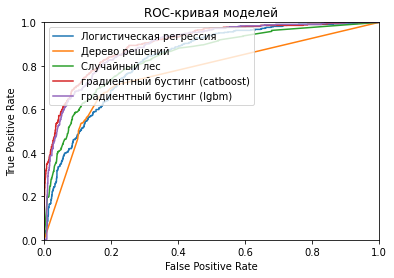

In [117]:
plt.figure()
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_gb, tpr_gb)
plt.plot(fpr_lgbm, tpr_lgbm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая моделей')
plt.legend(('Логистическая регрессия','Дерево решений', 'Случайный лес', 'градиентный бустинг (catboost)', 'градиентный бустинг (lgbm)'),
           loc= 'upper left') 
plt.show() 

## Анализ моделей 

In [118]:
rezult = pd.DataFrame({"модель": ["Логистическая регрессия", "Дерево решений", "Случайный лес", "Градиентный бустинг(CatBoost)", "Градиентный бустинг (LGBM)"], "значение roc-auc": [auc_roc_model_logistic, auc_roc_model_tree, auc_roc_model_forest, auc_roc_model_gb, auc_roc_model_lgbm]})
rezult

,модель,значение roc-auc
0,Логистическая регрессия,0.833431
1,Дерево решений,0.766963
2,Случайный лес,0.841576
3,Градиентный бустинг(CatBoost),0.902286
4,Градиентный бустинг (LGBM),0.894679


## Отчет о работе

1. Полученные датассеты были загружены, изучены. Проведены преобразовния: изменены форматы данных у необходимых полей, введены дополнительные поля, необходимые для анализа данных: day (количество дней, которое абонет является клиентом компании),  целевой признак churn_digit, показывающий отток клиентов. <br>
2. Изучена статистическая информация по полученным датасетам. Построены графики, отображающие долю пользователей телефонной связи, долю интернет-пользователей для ушедших, а также для всех клиентов оператора. <br>
3. Произведено кодирование номинальных переменных. Получены коэффициенты корреляции, отображающие зависимость параметров. Отобраны параметры, имеющие максимальный коэффициент корреляции с целевым признаком. <br>
4. Данные разбила на 2 выборки: на кроссвалидации определим лучшую модель, на тестовой определим метрику. <br>
5. Ключевые шаги в достижении наилучшего результата (значении метрики) это проведение масштабирования данных, а также борьба с дисбалансом путем увеличения выборки. <br>
6. Исследовала несколько моделей: Логистическая регрессия, Дерево решений, Случайный лес, Градиентный бустинг(CatBoost), Градиентный бустинг (LGBM). Для каждой модели были подобраны гиперпараметры. В результате для каждой модели рассчитана метрика roc-auc, использующаяся для оценивания качества упорядочивания алгоритмов объектов двух классов.<br>
7. В результате анализа моделей видно, что модель Градиентный бустинг(CatBoost)	 показывает значение немного лучше остальных - 0,9. Эта модель - лидер по поиску истинноположительных ответов. Это говорит о том, что она с большей вероятностью по сравнению с остальными моделями найдет тех клиентов, которые собираются уйти. <br>
